# Assoziationsanalyse - R-Beispiel
> Dieses Beispiel folgt demjenigen, welches [hier](http://rpubs.com/emzak208/281776) seitens [RStudio](https://www.rstudio.com/) bereit gestellt wird, mit dem Unterschied, dass wir den vom Paket *arules* mitgelieferten Datensatz direkt verwenden. Eine ausführliche Einführung in das Paket sowie die zugehörige Theorie findet man bei [CRAN](https://cran.r-project.org/web/packages/arules/vignettes/arules.pdf).

Falls noch nicht geschehen, so muss man zunächst das Paket **arules** installieren (durch Entfernung des Kommentarzeichens in der folgenden Codezelle).

In [1]:
# install.packages("arules")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Nun kann man mit dem Paket arbeiten.

In [1]:
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



Wir vervenden den mit dem Paket *arules* mitgelieferten Datensatz *"Groceries"*.

In [2]:
data("Groceries")
g <- Groceries
summary(g)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

Wir haben also einen Datensatz mit 9835 Transaktionen, in denen 169 verschiedene Artikel (*items*) vorkommen. Dieser wird wieder als *dünnbesetzte Matrix* (*sparse format*) abgespeichert.
Am weitaus häufigsten wurde Vollmilch gekauft (in mehr als ein Viertel der Fälle, d.h. mit einem Support von über 25%). Am häufigsten wurde nur ein einzelner (der betrachteten) Artikel gekauft, in einem Fall aber sogar 32 dieser Artikel zusammen: Im Mittel (als Maß hierfür wird der *Median* genommen) werden drei der Artikel zusammen gekauft.
Der Datensatz enthält außerdem u.U. *Hierarchien*, so dass eine *Frankfurter* (oder eine generische *Wurst*) eben zur Produktgruppe *Wurst* und diese wiederum zur Hauptgruppe *Fleisch und Wurst* gehört.

## Vorbetrachtungen

Nun betrachten wir die ersten fünf Transaktionen. Wir sehen, dass es sich jeweils einfach um eine Auflistung der gekauften Artikel handelt.

In [3]:
inspect(g[1:5])

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}


Es ist auch möglich, sich zu veranschaulichen, welche Position die gekauften Artikel der ersten fünf Transaktionen innerhalb der gesamten 169 Artikel haben durch Verwendung von *image*.

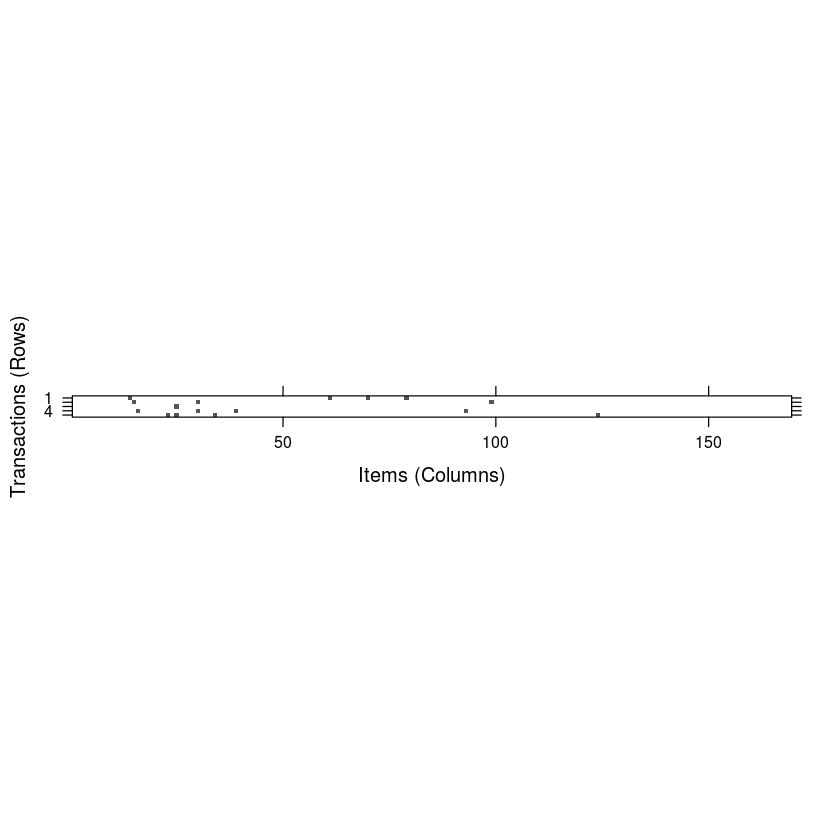

In [4]:
image(g[1:5])

Was man hier sieht ist, dass *implizit* eine dünnbesetzte Matrix zur Repräsentation der Itemsets genommen wird. Dabei entsprechen die Spaltenüberschriften den Items und die Zeilen den Transaktionen, so dass für die erste Transaktion unseres Groceries-Datensatzes also eine 1 in den Spalten `citrus fruit`, `semi-finished bread`, `margarine` und `ready soups` der Matrix steht und sonst überall eine 0. In der obigen Visualisierung sehen wir dann ein kleines schwarzes Quadrat dort, wo die 1 steht und sonst eine weiße Fläche. 

Im Übrigen ist die Struktur der Matrix damit genau die gleiche wie für ein *Vokabular* eines [*Count Vectorizers*](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) bei der Textklassifikation. Hier liegt dem aber ein anderer Ansatz zugrunde, nämlich die [Transformation kategorialer Variablen](http://pbpython.com/categorical-encoding.html) hier speziell durch [One-Hot_Encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). Dies ist einfach nur der Name für den oben genannten Ansatz der Matrixkonstruktion.

Wir können uns auch ein Bild der Dünnbesetztheit der Matrix machen, indem wir 100 zufällig ausgewählte Transaktionen auf diese Weise visualisieren.

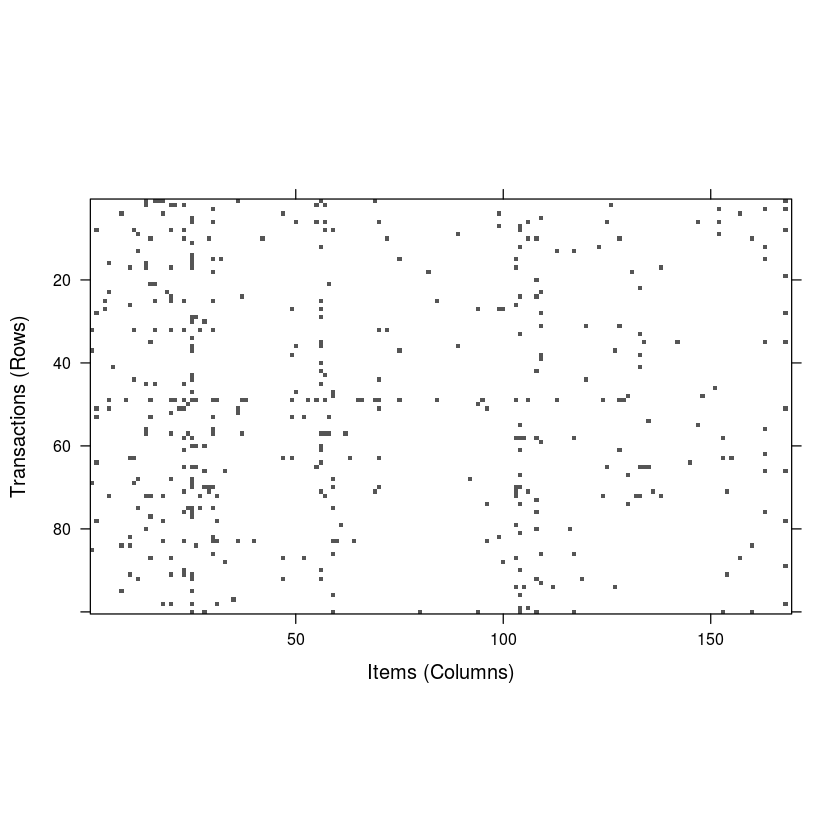

In [5]:
image(sample(g, 100))

Normaler Weise interessieren wir uns bei Aooziationsanalysen aber für (relative) Häufigkeiten. Daher schauen wir uns für die ersten drei Artikel deren relative Häufigkeit an.

In [6]:
itemFrequency(g[, 1:3])

frankfurter     sausage  liver loaf 
0.058973055 0.093950178 0.005083884

Das Ganze können wir auch visualisieren, wobei wir nur diejenigen Artikel haben möchten, die in mindestens 10% der Transaktionen gekauft wurden.

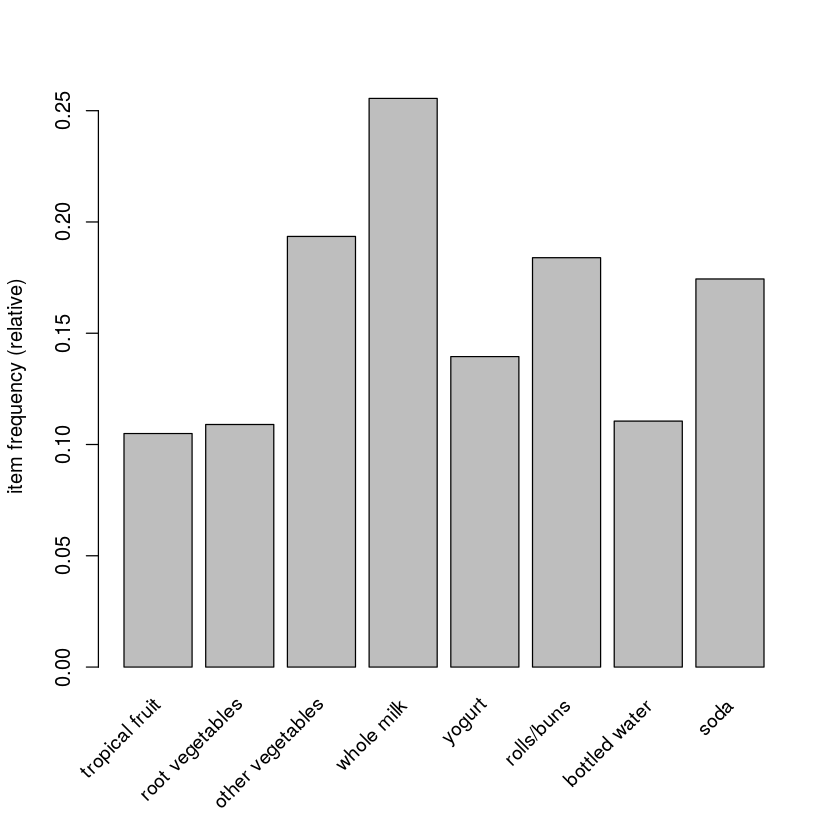

In [7]:
itemFrequencyPlot(g, support = 0.1)

Alternativ können wir aber auch die 20 am häufigsten gekauften Artikel mit dem zugehörigen Support plotten.

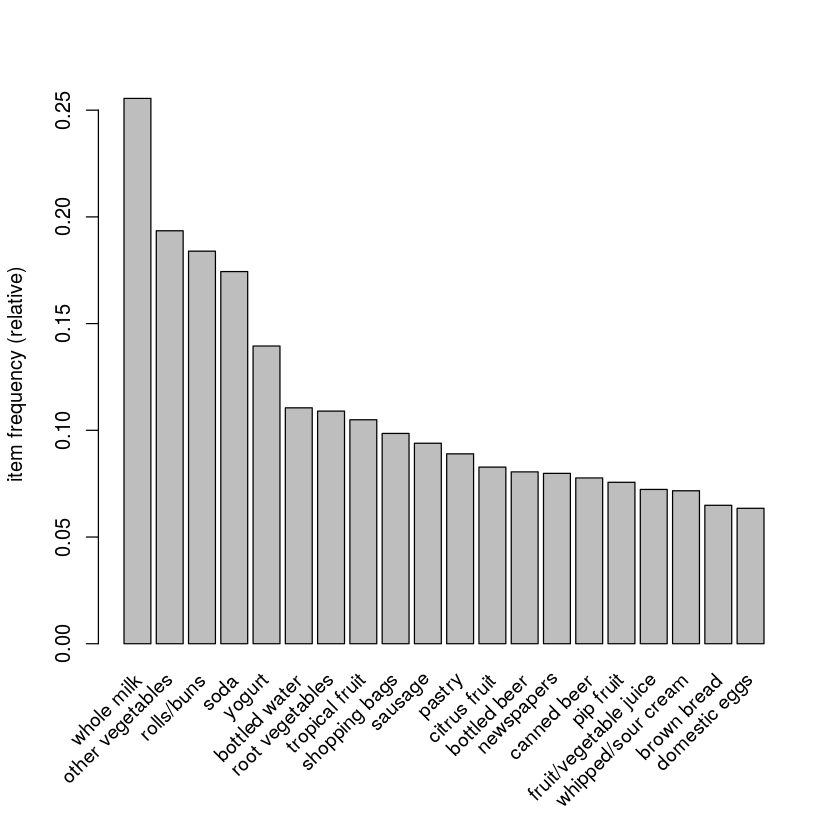

In [8]:
itemFrequencyPlot(g, topN = 20)

## Ermittlung der Regeln

Zunächst versuchen wir mit den Defaulteinstellungen des A-priori-Algorithmus auszukommen.

In [9]:
apriori(g)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

Leider führt das dazu, dass keine einzige Regel aufgestellt werden kann, da die Kombination eines Support von mindestens 10% und einer Confidence von mindestens 80% nicht erfüllt werden kann. Wir müssen daher sinnvollere Parameter wählen.

Hier wäre das ein Support von 6 Promille (d.h., dass es mindestens 59 Transaktionen gibt, in denen die Items (zusammen) vorkommen). Als Confidence wählen wir ein Viertel und wir möchten, dass eine Regel immer mindestens zwei Artikel beinhaltet.

In [10]:
grules <- apriori(g, parameter = list(support = 0.006, confidence = 0.25, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Wir erhalten also 463 Regeln, was wir auch nochmal explizit als Ausgabe bekommen, wenn wir einfach *grules* anschauen wollen. Mehr informationen liefert dann wieder die Zusammenfassung.

In [11]:
grules

set of 463 rules 

In [12]:
summary(grules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932   Min.   : 60.0  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229   1st Qu.: 70.0  
 Median :0.008744   Median :0.3554   Median :1.9332   Median : 86.0  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351   Mean   :113.5  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565   3rd Qu.:121.0  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565   Max.   :736.0  

mining info:
 data ntransactions support confidence
    g          9835   0.006       0.25

Wollen wir die Regeln selbst anschauen, so benötigen wir *inspect*.

In [13]:
inspect(grules[1:3])

    lhs             rhs               support     confidence lift     count
[1] {pot plants} => {whole milk}      0.006914082 0.4000000  1.565460 68   
[2] {pasta}      => {whole milk}      0.006100661 0.4054054  1.586614 60   
[3] {herbs}      => {root vegetables} 0.007015760 0.4312500  3.956477 69   


Wie man sieht sind nicht alle Regeln offensichtlich und vielleicht müsste man die Parameter noch ein wenig anpassen, um nicht zu gleuben , dass Topfpflanzen ein guter Indikator für Vollmilch sind ... (aber vielleicht liegt dem ja auch eine geheime Wahrheit zugrunde ...).

Interessantere Aussagen dürfte man bekommen, wenn man sich die Regeln mit dem höchsten *Lift* ansieht.

In [14]:
inspect(sort(grules, by = "lift")[1:5])

    lhs                   rhs                      support confidence     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886    89
[3] {tropical fruit,                                                                
     other vegetables,                                                              
     whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074    69
[4] {beef,                                                                          
     other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692    78
[5] {tropical fruit,                                                                
     other vegetables} => {pip fruit}          0.009456024  0.2634561 3.482649    93


Möglicherweise sieht man sich dann, inspiriert durch die zweite Regel, an, welche weiteren Regeln es gibt, die mit "Beeren" zu tun haben.

In [15]:
berryrules <- subset(grules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence lift     count
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  3.796886  89  
[2] {berries} => {yogurt}             0.010574479 0.3180428  2.279848 104  
[3] {berries} => {other vegetables}   0.010269446 0.3088685  1.596280 101  
[4] {berries} => {whole milk}         0.011794611 0.3547401  1.388328 116  


Oder wir interessieren uns nur für diejenigen Regeln, bei denen es zu einem *Substitutionseffekt* kommt.

In [16]:
substrules <- subset(grules, lift < 1.0)
inspect(sort(substrules, by= "lift", ascending=False))

    lhs               rhs          support    confidence lift      count
[1] {bottled beer} => {whole milk} 0.02043721 0.2537879  0.9932367 201  


In [17]:
# falls gewünscht kann man das auch exportieren ...
# write(grules, file = "groceryrules.csv", sep = ",", quote = TRUE, row.names = FALSE)

# oder in Form eines Data Frames damit weiter arbeiten
grules_df <- as(grules, "data.frame")

str(grules_df)

'data.frame':	463 obs. of  5 variables:
 $ rules     : Factor w/ 463 levels "{baking powder} => {other vegetables}",..: 237 204 128 127 129 238 317 21 89 90 ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
 $ count     : num  68 60 69 76 76 69 70 67 63 88 ...


In [18]:
head(grules_df)

rules,support,confidence,lift,count
{pot plants} => {whole milk},0.006914082,0.4000000,1.565460,68
{pasta} => {whole milk},0.006100661,0.4054054,1.586614,60
{herbs} => {root vegetables},0.007015760,0.4312500,3.956477,69
{herbs} => {other vegetables},0.007727504,0.4750000,2.454874,76
{herbs} => {whole milk},0.007727504,0.4750000,1.858983,76
{processed cheese} => {whole milk},0.007015760,0.4233129,1.656698,69


Um den Groceries-Datensatz auch in Python verwenden zu können, schreiben wir ihn noch in eine Datei:

In [20]:
write(g, file = "data/groceries_r_quoted.csv", sep = ",", quote = TRUE)

Diese Datei werden wir dann für die [praktische Umsetzung in Python](2017-12-15_RvS_Assoziationsanalyse_Python.ipynb) wieder einlesen.